In [3]:
# First, run this code in a cell
from google.colab import files
uploaded = files.upload()
# Then select the file from your computer

Saving AB_NYC_2019.csv to AB_NYC_2019 (1).csv
Saving New_York_City_.png to New_York_City_ (1).png


In [6]:
# Install necessary libraries (run this first)
!pip install pandas numpy matplotlib seaborn -q

# Import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

print("✅ Libraries installed and imported!")

✅ Libraries installed and imported!


In [9]:
# METHOD 1: Upload from your computer
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

# Get the filename
for filename in uploaded.keys():
    print(f"📂 Uploaded: {filename}")

    # Try different encodings one by one
    encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252', 'utf-16', 'windows-1252']

    for encoding in encodings_to_try:
        try:
            print(f"   Trying {encoding} encoding...")
            df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding=encoding)
            print(f"   ✅ Success with {encoding} encoding!")
            break
        except UnicodeDecodeError:
            print(f"   ❌ Failed with {encoding}")
            continue
        except Exception as e:
            print(f"   ⚠️ Other error with {encoding}: {str(e)[:50]}...")
            continue

# If all encodings fail, try with error handling
if 'df' not in locals() or df is None:
    print("\n🤔 All standard encodings failed. Trying with error handling...")
    try:
        df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='utf-8', errors='ignore')
        print("✅ Loaded with errors ignored (some characters may be lost)")
    except Exception as e:
        print(f"❌ Still failed: {e}")
        print("\n🆘 Last resort: Try opening as text first")
        content = uploaded[filename].decode('latin1', errors='ignore')
        with open('temp_file.csv', 'w') as f:
            f.write(content)
        df = pd.read_csv('temp_file.csv', encoding='latin1')

print("\n✅ Dataset loaded successfully!")

Saving AB_NYC_2019.csv to AB_NYC_2019.csv
Saving New_York_City_.png to New_York_City_.png
📂 Uploaded: AB_NYC_2019.csv
   Trying utf-8 encoding...
   ✅ Success with utf-8 encoding!
📂 Uploaded: New_York_City_.png
   Trying utf-8 encoding...
   ❌ Failed with utf-8
   Trying latin1 encoding...
   ⚠️ Other error with latin1: Error tokenizing data. C error: Expected 1 fields ...
   Trying ISO-8859-1 encoding...
   ⚠️ Other error with ISO-8859-1: Error tokenizing data. C error: Expected 1 fields ...
   Trying cp1252 encoding...
   ❌ Failed with cp1252
   Trying utf-16 encoding...
   ❌ Failed with utf-16
   Trying windows-1252 encoding...
   ❌ Failed with windows-1252

✅ Dataset loaded successfully!


STEP 2: MISSING VALUES ANALYSIS
❌ Found missing values:
                   Missing_Values  Percentage
reviews_per_month           10052   20.558339
last_review                 10052   20.558339
host_name                      21    0.042949
name                           16    0.032723


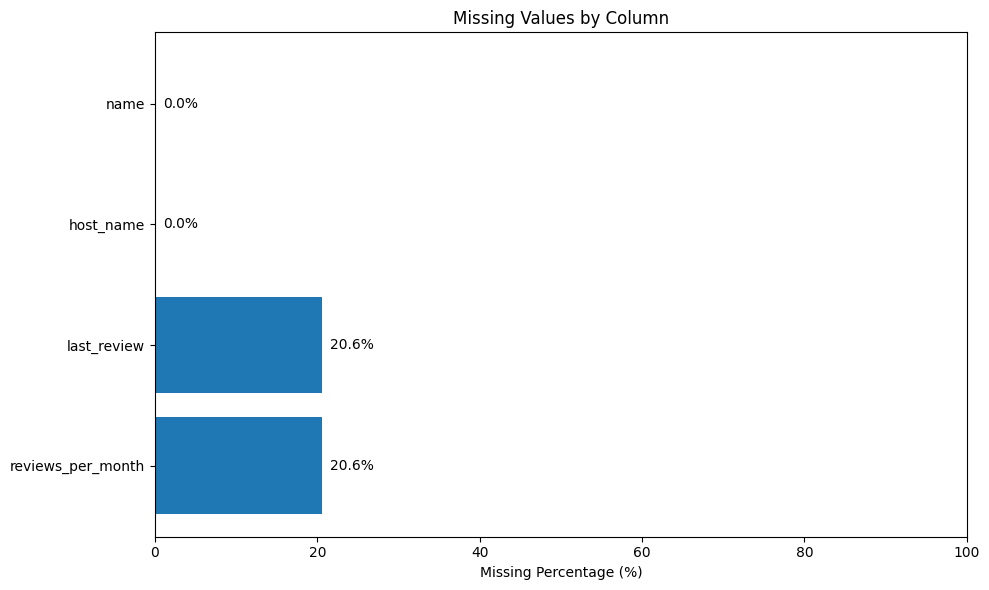

In [11]:
print("="*60)
print("STEP 2: MISSING VALUES ANALYSIS")
print("="*60)

# Find missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Create a summary table
missing_summary = pd.DataFrame({
    'Missing_Values': missing_data,
    'Percentage': missing_percent
})

# Show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing_Values'] > 0]
missing_summary = missing_summary.sort_values('Percentage', ascending=False)

if len(missing_summary) > 0:
    print("❌ Found missing values:")
    print(missing_summary)

    # Visualize missing values
    plt.figure(figsize=(10, 6))
    bars = plt.barh(missing_summary.index, missing_summary['Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.xlim(0, 100)

    # Add percentage labels
    for bar, value in zip(bars, missing_summary['Percentage']):
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{value:.1f}%', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found!")

In [12]:
print("="*60)
print("STEP 3: HANDLING MISSING VALUES")
print("="*60)

# Make a copy before cleaning
df_clean = df.copy()

# Strategy 1: Remove columns with too many missing values (optional)
# threshold = 70  # Remove columns with >70% missing
# cols_to_drop = [col for col in df_clean.columns
#                if (df_clean[col].isnull().sum() / len(df_clean)) * 100 > threshold]
# df_clean = df_clean.drop(columns=cols_to_drop)
# print(f"Dropped columns: {cols_to_drop}")

# Strategy 2: Fill missing values based on column type
for column in df_clean.columns:
    if df_clean[column].isnull().sum() > 0:
        print(f"\n🔍 Column: {column}")
        print(f"   Missing: {df_clean[column].isnull().sum()} values")

        # Check data type
        dtype = df_clean[column].dtype

        if dtype in ['int64', 'float64']:
            # Numeric column - fill with median
            median_val = df_clean[column].median()
            df_clean[column].fillna(median_val, inplace=True)
            print(f"   ✅ Filled with median: {median_val:.2f}")
        else:
            # Text/category column - fill with mode
            mode_val = df_clean[column].mode()[0] if not df_clean[column].mode().empty else 'Unknown'
            df_clean[column].fillna(mode_val, inplace=True)
            print(f"   ✅ Filled with mode: '{mode_val}'")

print("\n✅ Missing values handled!")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

STEP 3: HANDLING MISSING VALUES

🔍 Column: name
   Missing: 16 values
   ✅ Filled with mode: 'Hillside Hotel'

🔍 Column: host_name
   Missing: 21 values
   ✅ Filled with mode: 'Michael'

🔍 Column: last_review
   Missing: 10052 values
   ✅ Filled with mode: '2019-06-23'

🔍 Column: reviews_per_month
   Missing: 10052 values
   ✅ Filled with median: 0.72

✅ Missing values handled!
Remaining missing values: 0


/tmp/ipython-input-1788444107.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[column].fillna(mode_val, inplace=True)
/tmp/ipython-input-1788444107.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [13]:
print("="*60)
print("STEP 4: DUPLICATE ANALYSIS")
print("="*60)

# Find duplicates
duplicates_count = df_clean.duplicated().sum()
print(f"Found {duplicates_count} duplicate rows")

if duplicates_count > 0:
    # Show duplicate rows
    print("\n👁️ Sample duplicate rows:")
    duplicate_rows = df_clean[df_clean.duplicated(keep=False)]  # Keep all duplicates
    print(duplicate_rows.head())

    # Remove duplicates
    initial_rows = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    final_rows = len(df_clean)

    print(f"\n✅ Removed {initial_rows - final_rows} duplicate rows")
    print(f"New shape: {df_clean.shape}")
else:
    print("✅ No duplicates found!")

STEP 4: DUPLICATE ANALYSIS
Found 0 duplicate rows
✅ No duplicates found!


In [14]:
print("="*60)
print("STEP 5: DATA TYPE & TEXT CLEANING")
print("="*60)

# 1. Check text columns for inconsistencies
text_columns = df_clean.select_dtypes(include=['object']).columns

print("🧹 Cleaning text columns...")
for col in text_columns:
    # Remove extra spaces
    df_clean[col] = df_clean[col].astype(str).str.strip()

    # Convert to lowercase for consistency (optional)
    # df_clean[col] = df_clean[col].str.lower()

    # Show unique values for manual inspection
    unique_vals = df_clean[col].unique()[:5]
    print(f"   {col}: Sample values → {list(unique_vals)}")

# 2. Check date columns (if any)
date_columns = []
for col in df_clean.columns:
    # Try to convert to datetime if it looks like a date
    sample = df_clean[col].dropna().iloc[0] if not df_clean[col].dropna().empty else ""
    if isinstance(sample, str) and any(x in str(sample).lower() for x in ['202', '201', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']):
        date_columns.append(col)

if date_columns:
    print(f"\n📅 Possible date columns: {date_columns}")
    for col in date_columns:
        try:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
            print(f"   ✅ Converted {col} to datetime")
        except:
            print(f"   ❌ Could not convert {col}")

print("\n✅ Text and data types cleaned!")

STEP 5: DATA TYPE & TEXT CLEANING
🧹 Cleaning text columns...
   name: Sample values → ['Clean & quiet apt home by the park', 'Skylit Midtown Castle', 'THE VILLAGE OF HARLEM....NEW YORK !', 'Cozy Entire Floor of Brownstone', 'Entire Apt: Spacious Studio/Loft by central park']
   host_name: Sample values → ['John', 'Jennifer', 'Elisabeth', 'LisaRoxanne', 'Laura']
   neighbourhood_group: Sample values → ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
   neighbourhood: Sample values → ['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem']
   room_type: Sample values → ['Private room', 'Entire home/apt', 'Shared room']
   last_review: Sample values → ['2018-10-19', '2019-05-21', '2019-06-23', '2019-07-05', '2018-11-19']

📅 Possible date columns: ['last_review']
   ✅ Converted last_review to datetime

✅ Text and data types cleaned!


STEP 6: OUTLIER DETECTION
📊 Numeric columns found: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


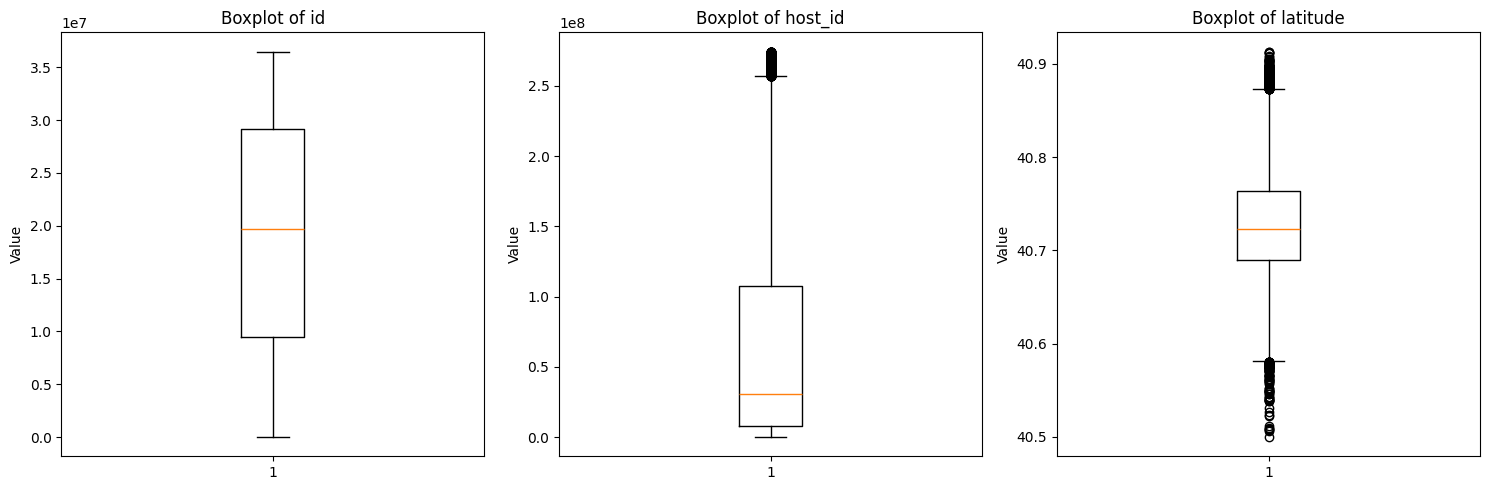


📝 Outlier Analysis (using IQR method):

   id:
      Range: [2539.00, 36487245.00]
      IQR bounds: [-20048405.25, 58672528.75]
      Outliers: 0 (0.0%)

   host_id:
      Range: [2438.00, 274321313.00]
      IQR bounds: [-141596552.00, 256853008.00]
      Outliers: 1526 (3.1%)
      ✅ Added outlier flag column: 'host_id_is_outlier'

   latitude:
      Range: [40.50, 40.91]
      IQR bounds: [40.58, 40.87]
      Outliers: 425 (0.9%)
      ✅ Added outlier flag column: 'latitude_is_outlier'

   longitude:
      Range: [-74.24, -73.71]
      IQR bounds: [-74.05, -73.87]
      Outliers: 2833 (5.8%)
      ✅ Added outlier flag column: 'longitude_is_outlier'

   price:
      Range: [0.00, 10000.00]
      IQR bounds: [-90.00, 334.00]
      Outliers: 2972 (6.1%)
      ✅ Added outlier flag column: 'price_is_outlier'

   minimum_nights:
      Range: [1.00, 1250.00]
      IQR bounds: [-5.00, 11.00]
      Outliers: 6607 (13.5%)
      ✅ Added outlier flag column: 'minimum_nights_is_outlier'

   nu

In [15]:
print("="*60)
print("STEP 6: OUTLIER DETECTION")
print("="*60)

# Find numeric columns
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

if len(numeric_cols) > 0:
    print(f"📊 Numeric columns found: {list(numeric_cols)}")

    # Create box plots to visualize outliers
    fig, axes = plt.subplots(1, min(3, len(numeric_cols)), figsize=(15, 5))
    if len(numeric_cols) == 1:
        axes = [axes]

    for i, col in enumerate(numeric_cols[:3]):  # Show first 3 only
        ax = axes[i] if len(numeric_cols) > 1 else axes[0]
        ax.boxplot(df_clean[col].dropna())
        ax.set_title(f'Boxplot of {col}')
        ax.set_ylabel('Value')

    plt.tight_layout()
    plt.show()

    # Calculate outliers using IQR method
    print("\n📝 Outlier Analysis (using IQR method):")
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        outlier_count = len(outliers)

        print(f"\n   {col}:")
        print(f"      Range: [{df_clean[col].min():.2f}, {df_clean[col].max():.2f}]")
        print(f"      IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"      Outliers: {outlier_count} ({outlier_count/len(df_clean)*100:.1f}%)")

        # Optional: Remove or cap outliers
        if outlier_count > 0:
            # OPTION 1: Cap outliers (recommended for beginners)
            # df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound,
            #                         np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col]))

            # OPTION 2: Mark outliers (add a new column)
            df_clean[f'{col}_is_outlier'] = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
            print(f"      ✅ Added outlier flag column: '{col}_is_outlier'")
else:
    print("ℹ️ No numeric columns found for outlier analysis")

In [16]:
print("="*60)
print("STEP 7: FINAL SUMMARY & SAVE")
print("="*60)

# Create cleaning report
print("📋 DATA CLEANING REPORT")
print("-" * 40)

original_shape = df.shape
final_shape = df_clean.shape

print(f"Original dataset: {original_shape[0]} rows × {original_shape[1]} columns")
print(f"Cleaned dataset:  {final_shape[0]} rows × {final_shape[1]} columns")
print(f"Rows removed:     {original_shape[0] - final_shape[0]}")
print(f"Columns added:    {final_shape[1] - original_shape[1]}")

# Check memory usage
print(f"\n💾 Memory usage:")
print(f"   Original: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Cleaned:  {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Final check for issues
print(f"\n🔍 Final Quality Check:")
print(f"   Missing values: {df_clean.isnull().sum().sum()}")
print(f"   Duplicates: {df_clean.duplicated().sum()}")
print(f"   Data types: {len(df_clean.dtypes.unique())} unique types")

# Save cleaned data
output_filename = 'cleaned_dataset.csv'
df_clean.to_csv(output_filename, index=False)
print(f"\n💾 Cleaned data saved as: '{output_filename}'")

# Display first few rows of cleaned data
print(f"\n👀 First 3 rows of cleaned data:")
print(df_clean.head(3))

STEP 7: FINAL SUMMARY & SAVE
📋 DATA CLEANING REPORT
----------------------------------------
Original dataset: 48895 rows × 16 columns
Cleaned dataset:  48895 rows × 24 columns
Rows removed:     0
Columns added:    8

💾 Memory usage:
   Original: 21.33 MB
   Cleaned:  19.59 MB

🔍 Final Quality Check:
   Missing values: 0
   Duplicates: 0
   Data types: 5 unique types

💾 Cleaned data saved as: 'cleaned_dataset.csv'

👀 First 3 rows of cleaned data:
     id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902

STEP 8: DOWNLOAD & VISUALIZATIONS


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ File downloaded to your computer!


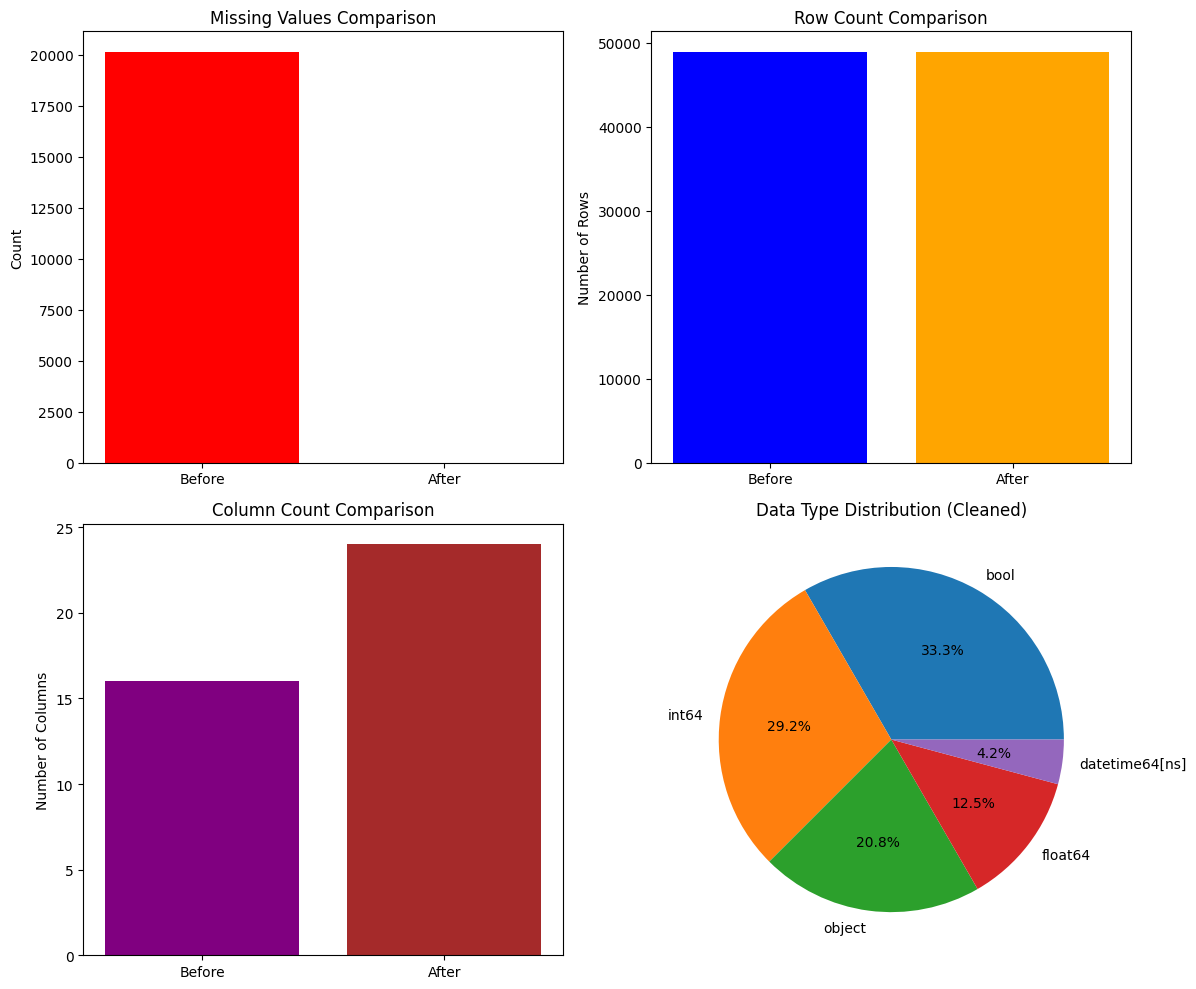


🎉 DATA CLEANING COMPLETE!
Next steps:
1. Check your downloads folder for 'cleaned_dataset.csv'
2. Open the file in Excel to see the cleaned data
3. Share your results with your supervisor


In [17]:
print("="*60)
print("STEP 8: DOWNLOAD & VISUALIZATIONS")
print("="*60)

# Download to your computer
files.download('cleaned_dataset.csv')
print("✅ File downloaded to your computer!")

# Optional: Create a comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Missing values comparison
ax1 = axes[0, 0]
missing_before = df.isnull().sum().sum()
missing_after = df_clean.isnull().sum().sum()
ax1.bar(['Before', 'After'], [missing_before, missing_after], color=['red', 'green'])
ax1.set_title('Missing Values Comparison')
ax1.set_ylabel('Count')

# 2. Row count comparison
ax2 = axes[0, 1]
ax2.bar(['Before', 'After'], [len(df), len(df_clean)], color=['blue', 'orange'])
ax2.set_title('Row Count Comparison')
ax2.set_ylabel('Number of Rows')

# 3. Column count comparison
ax3 = axes[1, 0]
ax3.bar(['Before', 'After'], [len(df.columns), len(df_clean.columns)], color=['purple', 'brown'])
ax3.set_title('Column Count Comparison')
ax3.set_ylabel('Number of Columns')

# 4. Data type distribution
ax4 = axes[1, 1]
dtype_counts = df_clean.dtypes.value_counts()
ax4.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%')
ax4.set_title('Data Type Distribution (Cleaned)')

plt.tight_layout()
plt.show()

print("\n🎉 DATA CLEANING COMPLETE!")
print("="*60)
print("Next steps:")
print("1. Check your downloads folder for 'cleaned_dataset.csv'")
print("2. Open the file in Excel to see the cleaned data")
print("3. Share your results with your supervisor")